In [1]:
import pandas as pd

measurements = {
  "2024-07-29 14:50": 0,
  "2024-07-30 11:08": 1.482,
  "2024-08-02 12:52": 7.028,
  "2024-08-14 10:53": 28.82,
  "2024-09-01 11:47": 62.85,
}

df = pd.DataFrame.from_dict(measurements, orient="index")
df.index = pd.to_datetime(df.index)
df.columns = ["total (kWh)"]

df

,total (kWh)
2024-07-29 14:50:00,0.000
2024-07-30 11:08:00,1.482
2024-08-02 12:52:00,7.028
2024-08-14 10:53:00,28.820
2024-09-01 11:47:00,62.850


In [3]:
start_time = df.index.min()
running_time = df.index - start_time
running_time_hours = running_time.total_seconds() / 3600
df["average power (W)"] = 1000 * (df["total (kWh)"] / running_time_hours)
df

,total (kWh),average power (W)
2024-07-29 14:50:00,0.000,NaN
2024-07-30 11:08:00,1.482,73.004926
2024-08-02 12:52:00,7.028,74.739454
2024-08-14 10:53:00,28.820,75.832127
2024-09-01 11:47:00,62.850,77.311028


In [5]:
unit_cost = 0.273  # GBP/kWh

running_time_days = running_time.total_seconds() / 86400
df["average cost per day (£)"] = (df["total (kWh)"] * unit_cost) / running_time_days
df

,total (kWh),average power (W),average cost per day (£)
2024-07-29 14:50:00,0.000,NaN,NaN
2024-07-30 11:08:00,1.482,73.004926,0.478328
2024-08-02 12:52:00,7.028,74.739454,0.489693
2024-08-14 10:53:00,28.820,75.832127,0.496852
2024-09-01 11:47:00,62.850,77.311028,0.506542


In [13]:
%pip install matplotlib scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   - -------------------------------------- 0.4/10.9 MB 11.6 MB/s eta 0:00:01
   -------- ------------------------------- 2.4/10.9 MB 30.2 MB/s eta 0:00:01
   ------------- -------------------------- 3.6/10.9 MB 28.8 MB/s eta 0:00:01
   ------------------- -------------------- 5.5/10.9 MB 31.7 MB/s eta 0:00:01
   ------------------------ --------------- 6.6/10.9 MB 30.1 MB/s eta 0:00:01
   ------------------------------------ --- 9.9/10.9 MB 37.1 MB/s eta 0:00:01
   ---------------------------------------- 10.9/10.9 MB 38.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   ---------------------------------------- 301.8/301.8 kB ? eta 0:00:00
   ----


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


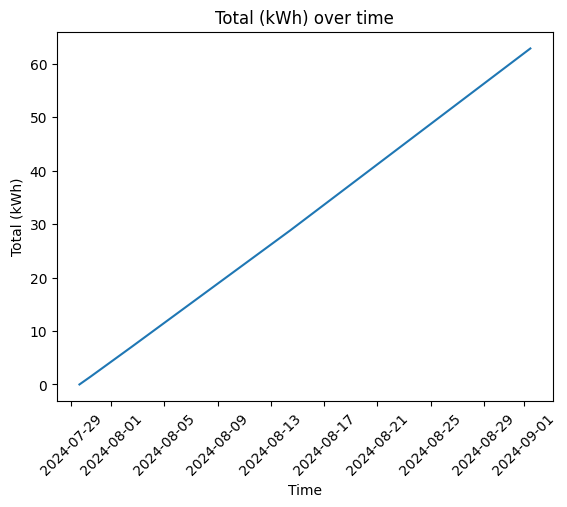

In [15]:
import matplotlib.pyplot as plt

# Plot df.index and df["total (kWh)"]
plt.plot(df.index, df["total (kWh)"])
plt.xlabel("Time")
plt.ylabel("Total (kWh)")
plt.title("Total (kWh) over time")
# angle xticks 45 degrees
plt.xticks(rotation=45)
plt.show()

The gradient (average rate of energy consumption) is: 0.07730027904118864 kWh per hour


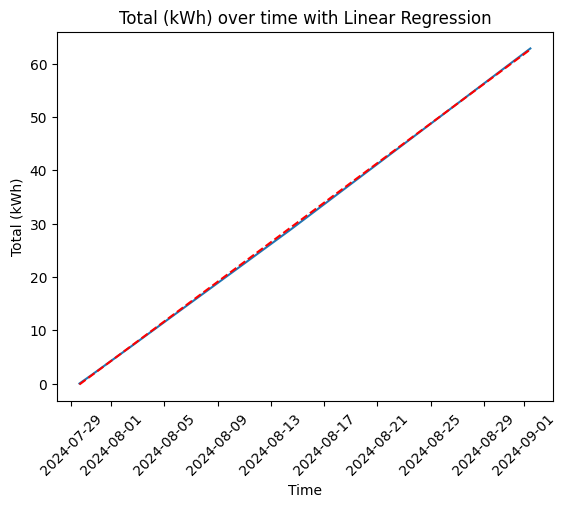

In [16]:
from sklearn.linear_model import LinearRegression

# Prepare data for linear regression
X = running_time_hours.values.reshape(-1, 1)  # Independent variable (time in hours)
y = df["total (kWh)"].values                    # Dependent variable (total energy)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the gradient (slope)
gradient = model.coef_[0] 
print(f"The gradient (average rate of energy consumption) is: {gradient} kWh per hour")

# You can also get the intercept (y-intercept)
intercept = model.intercept_

# Optionally, plot the regression line
plt.plot(df.index, df["total (kWh)"])
plt.plot(df.index, model.predict(X), color='red', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Total (kWh)")
plt.title("Total (kWh) over time with Linear Regression")
plt.xticks(rotation=45)
plt.show()